<a href="https://colab.research.google.com/github/Madhusudhanbandi/EVA4-S12/blob/master/EVA4_S12_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/My Drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd '/content/gdrive/My Drive/Colab Notebooks/'


/content/gdrive/My Drive/Colab Notebooks


In [0]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [0]:
#import the dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/annotate.csv")
df.head(10)

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,1.jpg,26799,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":29,""y"":28,""width"":284,""heig...","{""name"":""dog1"",""type"":""unknown"",""image_quality..."
1,3.jpg,30730,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":22,""y"":0,""width"":475,""heigh...","{""name"":""dog2"",""type"":""unknown"",""image_quality..."
2,4.jpg,108590,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":26,""y"":8,""width"":255,""heigh...","{""name"":""dog3"",""type"":""unknown"",""image_quality..."
3,5.jpg,40326,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":123,""y"":3,""width"":181,""heig...","{""name"":""dog4"",""type"":""unknown"",""image_quality..."
4,6.jpg,33864,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":46,""y"":21,""width"":447,""heig...","{""name"":""dog5"",""type"":""unknown"",""image_quality..."
5,8.jpg,49345,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":41,""y"":2,""width"":402,""heigh...","{""name"":""dog6"",""type"":""unknown"",""image_quality..."
6,11.jpg,6025,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":9,""y"":11,""width"":121,""heigh...","{""name"":""dog7"",""type"":""unknown"",""image_quality..."
7,12.jpg,8203,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":4,""y"":11,""width"":86,""height...","{""name"":""dog8"",""type"":""unknown"",""image_quality..."
8,13.jpg,109459,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":54,""y"":27,""width"":304,""heig...","{""name"":""dog9"",""type"":""unknown"",""image_quality..."
9,14.jpg,38665,"{""caption"":"""",""public_domain"":""no"",""image_url""...",1,0,"{""name"":""rect"",""x"":55,""y"":51,""width"":421,""heig...","{""name"":""dog10"",""type"":""unknown"",""image_qualit..."


In [0]:
def width(row):
    wh=row['region_shape_attributes']
    ro = wh.split('width":')[-1]
    r=ro.split(',')[0]
    return r


def height(row):
    wh=row['region_shape_attributes']
    rho = wh.split('height":')[-1]
    rh=rho.split('}')[0]
    return rh


df["width"]=df.apply(width,axis=1)
df["height"]=df.apply(height,axis=1)

df1=df[["filename","width","height"]]


In [0]:
df1.head()

,filename,width,height
0,1.jpg,284,447
1,3.jpg,475,372
2,4.jpg,255,268
3,5.jpg,181,317
4,6.jpg,447,461


In [0]:
x = df1.iloc[:, [1,2]].values

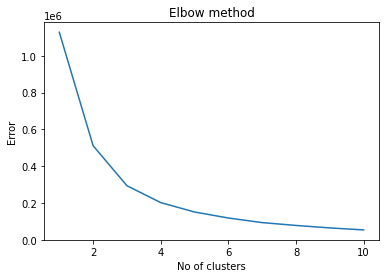

In [0]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [0]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_


[0 3 4 4 2 2 1 1 0 3 3 2 1 4 3 0 4 2 0 3 1 2 3 0 0 3 3 0 3 3 4 4 0 4 1 3 0
 1 3 2 3 1 2 0 0 0 4 4 3 4]


array([[273.5       , 434.5       ],
       [131.85714286, 162.85714286],
       [383.        , 438.        ],
       [433.07142857, 327.64285714],
       [247.        , 265.4       ]])

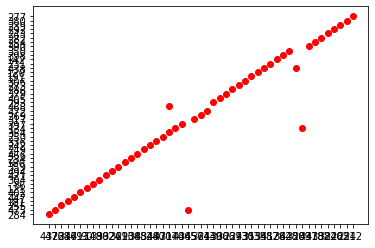

In [0]:
plt.scatter(df1["height"],df1["width"],color='red')